# Goodsreads reviews

In [1]:
import pandas as pd
import os
from os.path import join
import stanza
import re
from nltk import sent_tokenize
from collections import Counter
from langdetect import detect
import pandas as pd
import nltk
from nltk import word_tokenize,pos_tag
import matplotlib.pyplot as plt
import seaborn as sns

def remove_punctuation(words):
    new_list= []
    for w in words:
        if w.isalnum():
            new_list.append( w )
    return new_list

def sortedByValue( dict , ascending = True ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}

This notebook analyses reviews of books which were on the New York Times bestsellers lists in 2015. 

In [2]:
df = pd.read_csv('nyt_isbn.csv')

In [3]:
dir = 'GR'
reviews =os.listdir(dir)
reviews = [file for file in reviews if re.search(r'txt$',file)]

Reviews in langauges other than English are left out of consideration. 

In [4]:
count_m = 0
count_f = 0

other_languages = open('other_languages.txt','w',encoding='utf-8')

for i,row in df.iterrows():
    isbn = int(row['isbn'])
    path = join(dir,f'{isbn}.txt')

    if os.path.isfile(path):
        gender = row['gender']
        review_file = open(path,encoding='utf-8')
        new_path = join(dir,gender.strip(),f'{isbn}.txt')
        out = open(new_path,'w',encoding='utf-8')
        for review in review_file:

            if len(review.strip())>0:
                try:
                    if detect(review)=='en':
                        out.write(review)
                    else:
                        other_languages.write('-- Review in language other than English--\n')
                        other_languages.write(f'{review}\n\n')
                except:
                    other_languages.write('-- Language could not be detected --\n')
                    other_languages.write(f'{review}\n\n')

other_languages.close()

<a href="other_languages.txt">Reviews in languages other than English</a>

## Part of speech tagging

What are the most common adjectives and adverbs in reviews of books written by male authors?

In [5]:
pos_data = []
stopwords = ['i','not','so']

import nltk
from nltk import word_tokenize,pos_tag

freq_M = Counter()
freq_tags = Counter()

path = join(dir,'M')

reviews = os.listdir(path)
reviews = [file for file in reviews if re.search(r'txt$',file)]


for review in reviews:
    
    nr_modal = 0
    nr_comparative = 0
    vbp = 0
    vbz = 0


    full_text = ''
    with open(join(path,review)) as fh:
        full_text = fh.read().lower()

        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        words = [word for word in words if word not in stopwords]
        pos = pos_tag(words)
        
        words = []
        
        tags = []
        for p in pos:
            tags.append(p[1])

            if re.search(r'^JJ',p[1]) or re.search(r'^RB',p[1]):
                words.append(p[0])
                
        freq_tags = Counter(tags)

        freq_M.update(words)
        row = []
        row.append(freq_tags.get('MD',0))
        row.append(freq_tags.get('JJR',0)+freq_tags.get('RBR',0))
        row.append(freq_tags.get('VBP',0))
        row.append(freq_tags.get('VBZ',0))
        row.append('M')
        pos_data.append(row)
        

for word,count in freq_M.most_common(30):
    print(word,count)

more 4028
just 3665
really 2603
much 2456
very 2436
good 2307
even 2295
first 2282
also 2232
other 2067
well 1914
only 1818
many 1757
new 1697
still 1662
then 1649
most 1642
too 1611
now 1536
great 1510
never 1413
as 1376
here 1353
little 1334
s 1306
back 1264
always 1171
last 1078
best 1072
again 987


What are the most common adjectives and adverbs in reviews of books written by female authors?

In [6]:
freq_F = Counter()


path = join(dir,'F')

reviews = os.listdir(path)
reviews = [file for file in reviews if re.search(r'txt$',file)]


for review in reviews:
    
    nr_modal = 0
    nr_comparative = 0


    full_text = ''
    with open(join(path,review)) as fh:
        full_text = fh.read().lower()

        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        words = [word for word in words if word not in stopwords]
        pos = pos_tag(words)
        
        words = []
        
        tags = []
        for p in pos:
            tags.append(p[1])

            if re.search(r'^JJ',p[1]) or re.search(r'^RB',p[1]):
                words.append(p[0])
                
        freq_tags = Counter(tags)
   
        freq_F.update(words)
        row = []
        row.append(freq_tags.get('MD',0))
        row.append(freq_tags.get('JJR',0)+freq_tags.get('RBR',0))
        row.append(freq_tags.get('VBP',0))
        row.append(freq_tags.get('VBZ',0))
        row.append('F')
        pos_data.append(row)
                        
for word,count in freq_F.most_common(30):
    print(word,count)
  

more 2583
just 2530
really 1896
very 1756
much 1711
first 1561
even 1528
also 1520
good 1436
other 1419
many 1334
well 1212
only 1180
too 1143
never 1137
most 1112
then 1081
new 1057
now 947
little 946
still 925
great 904
always 860
s 851
back 836
as 829
own 824
here 724
different 663
best 663


Which adjectives and adverbs from the reviews of books written by male authors are NEVER used in the the reviews of books written by female authors? 

In [7]:
max = 50
i = 0

for word in freq_M.keys():
    if word not in freq_F.keys():
        print(word)
        i += 1
        if i == max:
            break
        

uthred
finall
showdown
uhtred
arcs
tooth
ultred
mercia
danish
weakened
peace
progressing
flame
booktube
channelspecial
annabeth
shudder
tranquil
quality
kingdom
enticingly
devourable
finan
unrivalled
criminally
leave
template
oaths
cornwell
oldof
looser
fictious
titled
norse
historian
wirral
roman
warfare
upshot
cake
alfred
nailed
episcopal
sicily
behead
murf
reclaim
norseman
awaited
bernard


Which adjectives and adverbs from the reviews of books written by female authors are NEVER used in the the reviews of books written by male authors? 

In [8]:
max = 50
i = 0

for word in freq_F.keys():
    if word not in freq_M.keys():
        print(word)
        i += 1
        if i == max:
            break

giffin
meredith
sanctimonious
litmus
unsaid
shrew
nolan
unfeeling
gabe
scheduled
irreverently
argh
josie
daniel
selfishishness
ticking
motherhood
northside
drive
indirectly
introvert
donor
shop
bistro
scrumptious
henrik
patriarchal
defined
inequitable
flickering
tantrum
preteen
anachronistically
internalized
snootiness
anthropologie
depressive
antithetical
heather
unhindered
toronto
griffin
drawn
weirdddd
morose
pull
godddd
reserved
poolside
eg


In [9]:
df = pd.DataFrame(pos_data,columns=['modal_verbs','comparative_words','non3-singular','3_singular','gender'])
df.head()

,modal_verbs,comparative_words,non3-singular,3_singular,gender
0,102,91,262,469,M
1,143,73,269,609,M
2,169,41,129,362,M
3,183,71,343,613,M
4,59,61,181,396,M


Are there differences in the use of modal verbs or in the use of adjectives or adverbs in the comparative form?

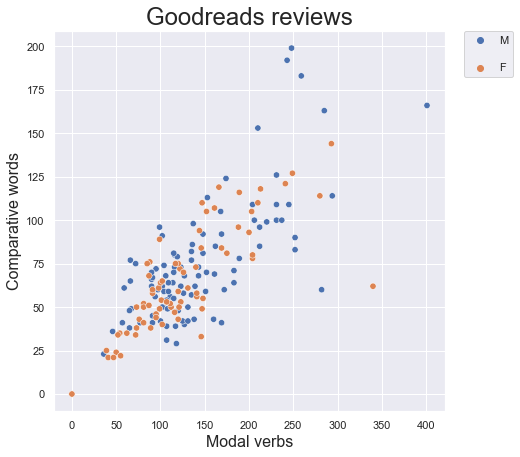

In [10]:
x_axis = 'modal_verbs'
y_axis =  'comparative_words'
point_colour = 'gender' 


fig = plt.figure( figsize = ( 7,7 ))

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,  
                     hue= point_colour , s = 40 )


ax.set_xlabel( 'Modal verbs'  , fontsize = 16 )
ax.set_ylabel( 'Comparative words'  , fontsize = 16 )
ax.set_title( 'Goodreads reviews' , fontsize=24 )


# this next line places the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

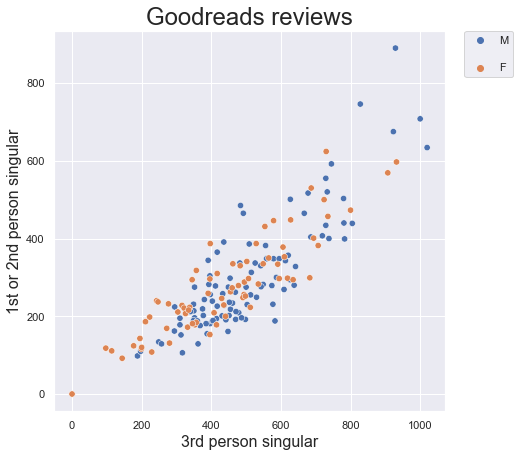

In [11]:
x_axis = '3_singular'
y_axis = 'non3-singular'
point_colour = 'gender' 


fig = plt.figure( figsize = ( 7,7 ))

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,  
                     hue= point_colour , s = 40 )


ax.set_xlabel( '3rd person singular'  , fontsize = 16 )
ax.set_ylabel( '1st or 2nd person singular'  , fontsize = 16 )
ax.set_title( 'Goodreads reviews' , fontsize=24 )


# this next line places the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

## Sentiment Analysis

What are the most negative and the most positive sentences in the reviews of books by male authors?

In [12]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()

review_scores = []

dir = 'GR'
path = join(dir,'M')

sent_scores = dict()

reviews = os.listdir(path)
reviews = [file for file in reviews if re.search(r'txt$',file)]

for review in reviews:

    full_text = ''
    with open(join(path,review)) as fh:
        full_text = fh.read()
    
    total = 0
    sentences = sent_tokenize(full_text)
    if len(sentences)>0:
        for s in sentences:
            scores = ana.polarity_scores(s)
            sent_scores[s] = scores['compound']
            total += scores['compound']
        avg = total / len(sentences)
        row = []
        row.append(review)
        row.append(avg)
        row.append('M')
        review_scores.append(row)

        
nr_sentences = 10

i = 0

print('\nPostive sentences\n')

for s in sortedByValue( sent_scores , ascending = False ):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break
        
print('\nNegative sentences\n')
i = 0
        
for s in sortedByValue( sent_scores , ascending = True):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break


Postive sentences

the closest i can think of off the top of my head is Against the Day, but Pynchon characters are just kind of vectors for historical forces, Moore actually genuinely likes these people and wants you to as well, and pulls it off nicely, you're interested in their lives and fortunes, it's good and his metaphysical nature of time and mortality stuff is fun to think about and engage with, honestly it's a pretty strong start. [0.9908]
“Aren't you afraid you're going to break everything and not be able to put it back together?”I am particularly happy to be sharing this review with you, fellow readers, mainly because it means I have very successfully survived the thirty heart attacks Morning Star so kindly gave me, and secondly because this trilogy is now so dear to me, I am almost tempted to discourage you all from ever giving it even half a thought, so as to keep it to myself like the most precious treasure -and please don't feel obliged to look dismayed; if you have eve

What are the most negative and the most positive sentences in the reviews of books by female authors?

In [13]:

dir = 'GR'
path = join(dir,'F')

sent_scores = dict()

reviews = os.listdir(path)
reviews = [file for file in reviews if re.search(r'txt$',file)]

for review in reviews:

    full_text = ''
    with open(join(path,review)) as fh:
        full_text = fh.read()
    
    total = 0
    sentences = sent_tokenize(full_text)
    if len(sentences)>0:
        for s in sentences:
            scores = ana.polarity_scores(s)
            sent_scores[s] = scores['compound']
            total += scores['compound']
        avg = total / len(sentences)
        row = []
        row.append(review)
        row.append(avg)
        row.append('F')
        review_scores.append(row)
        
nr_sentences = 10

i = 0

print('\nPostive sentences\n')

for s in sortedByValue( sent_scores , ascending = False ):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break
        
print('\nNegative sentences\n')
i = 0
        
for s in sortedByValue( sent_scores , ascending = True):
    print( f'{s} [{ sent_scores[s]}]' )
    i+= 1
    if i == nr_sentences:
        break


Postive sentences

I have read every book that Danielle Steel but this one - I couldn't get into it
This book is really close to my heart because it's written by my favorite author, the plot hits home and it was a gift from the most amazing soul on my last birthday (thanks @leno_katlholo 🫂) Precious Gifts is a story about Veronique, an ex-wife and mother who has raised three beautiful strong daughters. [0.9918]
The story is not just a coming of age, but the second half is a love story, wherein Addie finds a man who not only sees her as beautiful, but as intelligent, strong, and capable- who sees Addie as an equal, showing readers that real love means respect, and that women deserve partners who know that. [0.989]
We see her as a romantic feminist, a literary genius juggling fame, love and family, a doting and sensual lover (for both sexes), a loving and dedicated parent, a loyal and compassionate friend and an innate music lover all rolled into one. [0.987]
You've got a vast group of 

In [14]:
df = pd.DataFrame(review_scores,columns=['review','sentiment_score','gender'])

On the whole, are the reviews in the first group more positive than the reviews in the second group?

<AxesSubplot:xlabel='gender', ylabel='sentiment_score'>

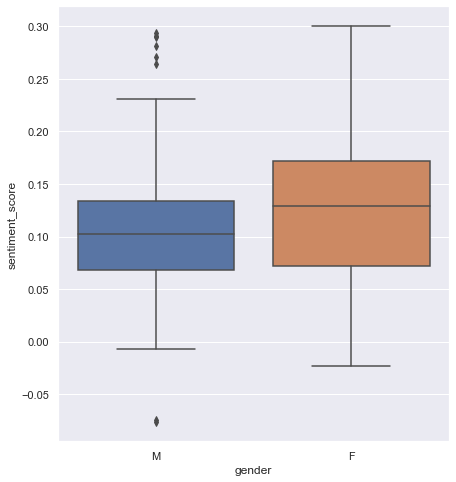

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure( figsize = ( 7,8 ))
sns.boxplot(data = df , y='sentiment_score' , x = 'gender')